<a href="https://colab.research.google.com/github/Hilbert-HN/HN_ML_From_Scratch/blob/main/01_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**01-MNIST** \
MNIST is black and white handwritten digits dataset available in Keras \
[Tutorial] - https://www.tensorflow.org/tutorials/quickstart/beginner \
[Book: Deep Learning with Python, François Chollet] - Chapter 2



## **0-Import TensorFlow**

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.8.0


## **1-Load Dataset**

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
print(y_train)

[5 0 4 ... 5 6 8]


In [ ]:
#Each image in MNIST dataset is an 28x28 matix with 0-255 values
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## **2-Preprocessing the dataset**

Transfom the 0-255 values in the matrix to between 0-1

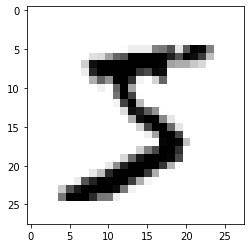

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0], cmap='gray_r')
plt.show()

In [ ]:
# Tensorflow keep the image as matrix and flatten in the network
x_train_T = x_train / 255.0
x_test_T = x_test / 255.0
#x_train_T[0]

In [ ]:
# Deep Learning with Python flatten the image first
x_train_D = x_train.reshape((60000, 28*28))
x_train_D = x_train_D.astype('float32') / 255
x_test_D = x_test.reshape((10000, 28*28))
x_test_D = x_test_D.astype('float32') / 255
#x_train_D[0]

## **3-Build the network architecture**

**Tensorflow**

In [ ]:
#Tensorflow example didnt import below and use tf.keras. when using keras API
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#tensorflow - network architecture
model_T = keras.Sequential([
                          layers.Flatten(input_shape=(28,28)),
                          layers.Dense(128, activation = 'relu'),
                          layers.Dropout(0.2),
                          layers.Dense(10)
])

In [ ]:
#try to do prediction withou training
predictions = model_T (x_train_T[:1]).numpy()
predictions

array([[-0.3374871 , -0.02862667,  0.75917304,  0.39684522, -0.59658414,
         0.37158725, -0.07235338, -0.38866174,  0.84360445,  0.062584  ]],
      dtype=float32)

In [ ]:
#below layer can be combine with above model as an activation function
#layers.Dense(10,activation = 'softmax')
#it convert the logit output to probabiliites for each class, which added up to be 1
#Tensflow do not recommend to combine
probability_model_T = keras.Sequential([
                                      model_T,
                                      layers.Softmax()
])

*Note: It is possible to bake the tf.nn.softmax function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.*

**Deep Learning with python**

In [ ]:
#Tensorflow example didnt import below and use tf.keras. when using keras API
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Deep Learning with Python - network architecture
model_D = keras.Sequential([
        layers.Dense(512, activation = 'relu'),
        layers.Dense(10, activation='softmax')
])

## **4-Complite Model with optimizer, loss, metrics**

**TensorFlow**

Define loss function by calling keras.losses

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
#lets get the loss between the correct label vs random prediction 
loss_fn(y_train[:1], predictions).numpy()

2.1385956

In [ ]:
model_T.compile(optimizer = 'adam',
              loss=loss_fn,
              metrics=['accuracy'])

**Deep Learning with Python**

loss function is defined inside model.complie

In [ ]:
model_D.compile(optimizer = 'rmsprop',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])

## **5-Train the model**

In [ ]:
# # Clean the model before new training,
# # run step 3, 4 again
# model_T = []
# model_D = []

In [ ]:
# To get the history for viewing curve
# add validation_data
history_T = model_T.fit(x_train_T, y_train, 
            epochs=5, 
            validation_data = (x_test_T, y_test))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2957 - accuracy: 0.9144 - val_loss: 0.1351 - val_accuracy: 0.9602
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1405 - accuracy: 0.9577 - val_loss: 0.0992 - val_accuracy: 0.9699
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1070 - accuracy: 0.9672 - val_loss: 0.0850 - val_accuracy: 0.9726
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0872 - accuracy: 0.9728 - val_loss: 0.0795 - val_accuracy: 0.9747
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0733 - accuracy: 0.9772 - val_loss: 0.0809 - val_accuracy: 0.9761


In [ ]:
# batch allow the gradient descent to adjust the weighting taking the average loss of the 128 num of training for gradient descent update
history_D = model_D.fit(x_train_D, y_train,
            epochs=5,
            batch_size=128,
            validation_data = (x_test_D, y_test))

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2562 - accuracy: 0.9264 - val_loss: 0.1180 - val_accuracy: 0.9660
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1024 - accuracy: 0.9700 - val_loss: 0.0847 - val_accuracy: 0.9746
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0670 - accuracy: 0.9795 - val_loss: 0.0794 - val_accuracy: 0.9765
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0483 - accuracy: 0.9854 - val_loss: 0.0732 - val_accuracy: 0.9781
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0368 - accuracy: 0.9890 - val_loss: 0.0637 - val_accuracy: 0.9815


## **6-Evaluate the model with Test set**

In [ ]:
model_T.evaluate(x_test_T,  y_test, verbose=2)

313/313 - 0s - loss: 0.0809 - accuracy: 0.9761 - 380ms/epoch - 1ms/step


[0.08089658617973328, 0.9761000275611877]

In [ ]:
model_D.evaluate(x_test_D,  y_test, verbose=2)

313/313 - 1s - loss: 0.0637 - accuracy: 0.9815 - 628ms/epoch - 2ms/step


[0.06367316097021103, 0.9815000295639038]

## **7-Prediction**

In [ ]:
import random
test_index = random.randint(0,10000)
test_index

3888

In [ ]:
y_test[test_index]

9

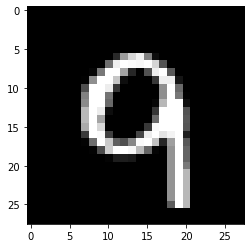

In [ ]:
plt.imshow(x_test[test_index],cmap="gray")
plt.show()

In [ ]:
prediction_T = probability_model_T(x_test_T[[test_index]])
prediction_T = prediction_T.numpy()
prediction_T

array([[2.61996342e-06, 2.38070030e-09, 1.13391425e-05, 1.93959522e-06,
        5.63305290e-03, 9.49076139e-07, 6.56577527e-07, 1.64499669e-03,
        1.32365494e-05, 9.92691219e-01]], dtype=float32)

In [ ]:
prediction_D = model_D.predict(x_test_D[[test_index]])
prediction_D

array([[4.9864998e-06, 9.4411534e-13, 2.8255158e-07, 1.9222268e-06,
        5.5272115e-04, 2.2730112e-05, 7.8198340e-08, 2.1444257e-04,
        3.5666960e-06, 9.9919933e-01]], dtype=float32)

In [ ]:
prediction_T[0].argmax()

9

In [ ]:
prediction_D[0].argmax()

9

## **8-Visualize the loss and accuracy**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history_dict_T = history_T.history
history_dict_D = history_D.history
history_dict_T.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

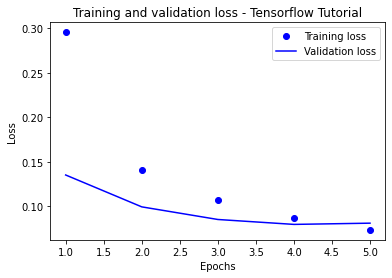

In [ ]:
loss_values_T = history_dict_T ['loss']
val_loss_values_T = history_dict_T ['val_loss']
epochs = range(1, len(loss_values_T) + 1)

plt.plot(epochs, loss_values_T, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values_T, 'b', label = 'Validation loss')
plt.title("Training and validation loss - Tensorflow Tutorial")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

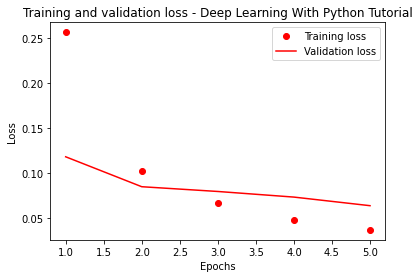

In [ ]:
plt.clf() # clear

loss_values_D = history_dict_D ['loss']
val_loss_values_D = history_dict_D ['val_loss']
epochs = range(1, len(loss_values_D) + 1)

plt.plot(epochs, loss_values_D, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss_values_D, 'r', label = 'Validation loss')
plt.title("Training and validation loss - Deep Learning With Python Tutorial")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

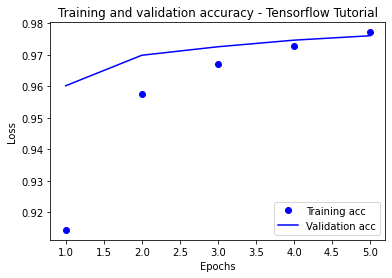

In [ ]:
plt.clf()

acc_T = history_dict_T ['accuracy']
val_acc_T = history_dict_T ['val_accuracy']

plt.plot(epochs, acc_T , 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_T , 'b', label = 'Validation acc')
plt.title("Training and validation accuracy - Tensorflow Tutorial")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


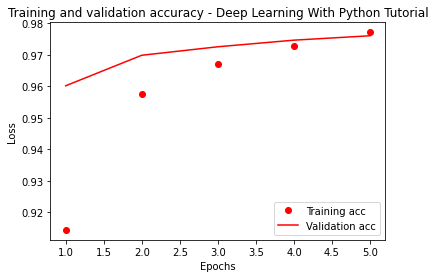

In [ ]:
plt.clf()

acc_D = history_dict_D ['accuracy']
val_acc_D = history_dict_D ['val_accuracy']

plt.plot(epochs, acc_T , 'ro', label = 'Training acc')
plt.plot(epochs, val_acc_T , 'r', label = 'Validation acc')
plt.title("Training and validation accuracy - Deep Learning With Python Tutorial")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()